# Assignment 8A - Hasanat Hasan

## Problem 1: Rolling Dice:
### a) Write a program that generates and prints out two random numbers between 1 and 6, to simulate the rolling of two dices. 

In [ ]:
import numpy as np

for Pb in range(10):
    dice_1 = np.random.randint(1, 7)  # Upper bound is exclusive, so use 7 to include 6
    dice_2 = np.random.randint(1, 7)
    print(f"({dice_1}, {dice_2})")

(4, 5)
(1, 4)
(5, 1)
(5, 1)
(6, 1)
(2, 2)
(4, 6)
(4, 4)
(4, 4)
(6, 6)


### b) Modify your program to simulate rolling two dice one million times. Count how often a double six appears, then divide this count by one million to obtain the fraction of double sixes. You should get something close to, though probably not exactly equal to $1/36$

In [ ]:
import numpy as np

double_six = 0
num_rolls = 1000000
for Pb in range(num_rolls):
    dice_1 = np.random.randint(1, 7)  
    dice_2 = np.random.randint(1, 7)
    # print(f"({dice_1}, {dice_2})")
    if dice_1 == 6 and dice_2 == 6:
        double_six +=1

# print("number of doubles:", double_six)
probability = double_six/num_rolls
print("probability of rolling double six:", probability)

probability of rolling double six: 0.027737
0.027777777777777776


## Problem 2 (40 points): Radioactive Decay Chain
### a) for each atom of 209Pb in turn, decide at random, with the appropriate probability, whether it decays or not. The probability is given in the class notes
$$
P(t) = 1 - 2^{-t/\tau}
$$
### Count the total number that decay, subtract it from the number of $Pb^{209}$ atoms, and add it to the number of $Bi^{209}$ atoms

## Utilities


In [18]:
import numpy as np
rng = np.random.default_rng(42)

def decay_chain(initial_particles_list: list, 
                decay_probabilities: list, 
                time_array: np.ndarray):
    """
    Efficient simulation of a decay chain (e.g., Tl -> Pb -> Bi) using vectorized binomial sampling.
    """
    num_types = len(initial_particles_list)
    n_steps = len(time_array)
    
    # Preallocate particle history with NumPy arrays for speed
    particles_history = np.zeros((num_types, n_steps), dtype=int)
    particles = np.array(initial_particles_list, dtype=int)

    for t, _ in enumerate(time_array):
        # Record particle counts at this timestep
        particles_history[:, t] = particles
        
        # Apply decays using binomial draws
        for i in range(num_types - 1):
            decays = rng.binomial(particles[i], decay_probabilities[i])
            particles[i] -= decays
            particles[i + 1] += decays
    
    # Return as list of lists if desired
    return particles_history.tolist()


def Bi_decay_chain(initial_particles_list: list, 
                   decay_probabilities: list, 
                   time_array: np.ndarray):
    """
    Solves the particular decay chain:
        Bi_213 --> Pb_209  -> Bi_209
               |-> Tl_209 -> Bi_209
    """
    num_types = len(initial_particles_list)
    particles_list = [initial_particles_list[i] for i in range(num_types)]
    particles_history = [[] for _ in range(num_types)]
    
    for _ in time_array:
        # Record current counts
        for j in range(num_types):
            particles_history[j].append(particles_list[j])

        # Simulate decays using binomial sampling
        # Bi-213 decay (with branching)
        bi_decays = rng.binomial(particles_list[0], decay_probabilities[0])
        particles_list[0] -= bi_decays

        to_pb = rng.binomial(bi_decays, 0.97)
        to_tl = bi_decays - to_pb
        particles_list[1] += to_pb  # Pb_209
        particles_list[2] += to_tl  # Tl_209

        # Pb-209 decay
        pb_decays = rng.binomial(particles_list[1], decay_probabilities[1])
        particles_list[1] -= pb_decays
        particles_list[3] += pb_decays  # Bi_209

        # Tl-209 decay
        tl_decays = rng.binomial(particles_list[2], decay_probabilities[2])
        particles_list[2] -= tl_decays
        particles_list[3] += tl_decays  # Bi_209

    return particles_history



## Solution plot

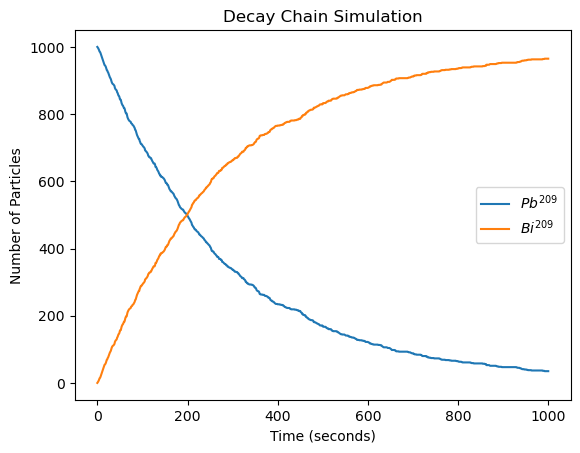

In [20]:
import matplotlib.pyplot as plt
import numpy as np

num_Pb_209 = 1000
num_Bi_209  = 0
Pb_tau = 3.3 * 60
dt = 1
k_Pb = dt/Pb_tau
probability_Pb = 1 - 2**(-k_Pb)

tmax = 1000 # seconds
time_array = np.arange(0.0,tmax+dt,dt)
particle_list =[num_Pb_209, num_Bi_209]
probabilities = [probability_Pb]
Pb_209_list,Bi_209_list = decay_chain(particle_list,
                                    probabilities,
                                    time_array)

plt.plot(time_array, Pb_209_list, label=r'$Pb^{209}$')
plt.plot(time_array, Bi_209_list, label=r'$Bi^{209}$')
plt.title("Decay Chain Simulation")
plt.xlabel("Time (seconds)")
plt.ylabel("Number of Particles")
plt.legend()
plt.show()



### b) Now do the same for $Tl^{209}$, except that decaying atoms are subtracted from the total for $Tl^{209}$ and added to the total for $Pb^{209}$

## Solution plot

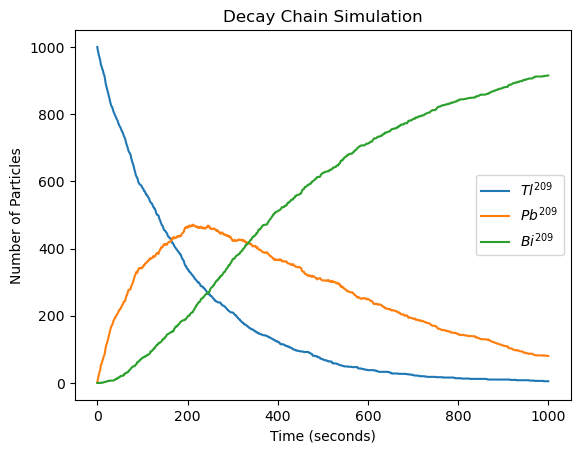

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Initial conditions and parameters
num_Tl_209 = 1000
num_Pb_209 = 0
num_Bi_209 = 0

Tl_tau = 2.2 * 60  # seconds
Pb_tau = 3.3 * 60  # seconds
dt = 1  # time step in seconds

k_Tl = dt / Tl_tau
k_Pb = dt / Pb_tau

probability_Tl = 1 - 2**(-k_Tl)
probability_Pb = 1 - 2**(-k_Pb)

tmax = 1000  # seconds
time_array = np.arange(0.0, tmax + dt, dt)

# Initial particles and probabilities for the chain
initial_particles = [num_Tl_209, num_Pb_209, num_Bi_209]
decay_probabilities = [probability_Tl, probability_Pb]

# Simulate the decay chain
particle_history = decay_chain(initial_particles, decay_probabilities, time_array)

# Unpack the results
Tl_209_list, Pb_209_list, Bi_209_list = particle_history

# Plotting the results
plt.plot(time_array, Tl_209_list, label=r'$Tl^{209}$')
plt.plot(time_array, Pb_209_list, label=r'$Pb^{209}$')
plt.plot(time_array, Bi_209_list, label=r'$Bi^{209}$')
plt.title("Decay Chain Simulation")
plt.xlabel("Time (seconds)")
plt.ylabel("Number of Particles")
plt.legend()
plt.show()



### c) For $\text{Bi}^{213}$, the situation is more complicated: when a $\text{Bi}^{213}$ atom decays, you have to decide at random with the appropriate probability the route by which it decays. Count the numbers that decay by each route and add and subtract accordingly.

## Solution plot

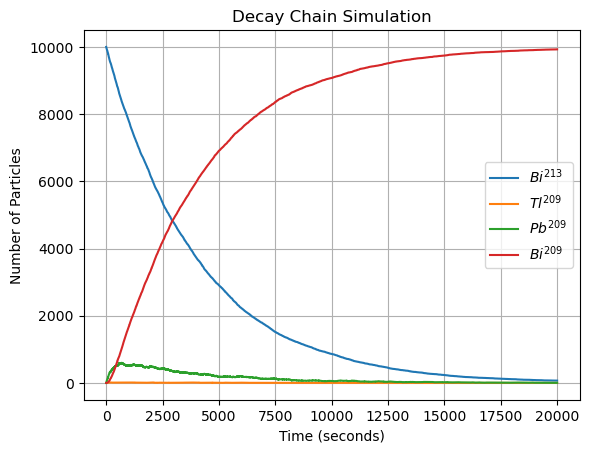

In [11]:
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.default_rng(42)

# Initial conditions and parameters
num_Bi_213 = 10000
num_Pb_209 = 0
num_Tl_209 = 0
num_Bi_209 = 0

Bi_tau = 46 * 60  # seconds (half-life of Bi-213)
Tl_tau = 2.2 * 60  # seconds
Pb_tau = 3.3 * 60  # seconds
dt = 1  # time step in seconds

k_Tl = dt / Tl_tau
k_Pb = dt / Pb_tau
k_Bi = dt / Bi_tau

probability_Bi = 1 - 2**(-k_Bi)
probability_Pb = 1 - 2**(-k_Pb)
probability_Tl = 1 - 2**(-k_Tl)

tmax = 20000  # seconds
time_array = np.arange(0.0, tmax + dt, dt)

decay_probabilities = [probability_Bi, probability_Pb, probability_Tl]
particle_list = [num_Bi_213, num_Pb_209, num_Tl_209, num_Bi_209]
# particle_history = Bi_decay_chain(particle_list, decay_probabilities, time_array)
particle_history = Bi_decay_chain(particle_list, decay_probabilities, time_array)
Bi_213_list, Pb_209_list, Tl_209_list, Bi_209_list = particle_history

# Plotting the results
plt.plot(time_array, Bi_213_list, label=r'$Bi^{213}$')
plt.plot(time_array, Tl_209_list, label=r'$Tl^{209}$')
plt.plot(time_array, Pb_209_list, label=r'$Pb^{209}$')
plt.plot(time_array, Bi_209_list, label=r'$Bi^{209}$')
plt.title("Decay Chain Simulation")
plt.xlabel("Time (seconds)")
plt.ylabel("Number of Particles")
plt.legend()
plt.grid()
plt.show()






## Problem 3: Brownian Moion
### Write a program to perform a 10000 steps of this process on a lattice with $L = 101$ and make an animation on the screen of the position of the particle. (We choose an odd length for the side of the square so that there is one lattice site exactly in the center.)

## Utilities

In [202]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def simulate_random_walk(L: int, iterations: int) -> list[np.ndarray]:
    """
    Simulates a random walk on a square grid of size L x L.
    
    Parameters:
        L (int): The size of the grid (L x L).
        iterations (int): The number of steps to simulate.
    
    Returns:
        List[np.ndarray]: A list of positions (as numpy arrays) representing the path of the random walk.
    """
    # Movement directions, only in one direction (X or Y)
    moves = np.array([
        [0, 1],   # up (Y+)
        [0, -1],  # down (Y-)
        [-1, 0],  # left (X-)
        [1, 0]    # right (X+)
    ])

    # Initialize RNG and starting position (center of the grid)
    rng = np.random.default_rng()
    center = np.array([(L - 1) // 2, (L - 1) // 2])  # Start in the center
    position = center.copy()

    # Track history
    particle_history: list[np.ndarray] = [position.copy()]

    # Simulate random walk
    for _ in range(iterations):
        valid_move_found = False
        
        while not valid_move_found:
            # Randomly choose one move
            move = moves[rng.integers(0, len(moves))]

            # Calculate the new potential position
            new_position = position + move
            
            # If the new position is within bounds, update it
            if 0 <= new_position[0] < L and 0 <= new_position[1] < L:
                position = new_position
                valid_move_found = True  # Valid move, exit the loop

        # Add the current position to the history
        particle_history.append(position.copy())

    return particle_history

def animate_walk(L: int, iterations: int, filename: str):
    history = simulate_random_walk(L, iterations)

    # Create figure and axis
    fig, ax = plt.subplots()
    ax.set_xlim(0, L - 1)
    ax.set_ylim(0, L - 1)
    ax.set_aspect('equal', 'box')
    ax.set_title("Random Walk Animation")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.grid(True)

    # Initialize the scatter plot
    scatter = ax.scatter([], [], color='red', s=50)

    def update(frame):
        ax.clear()  # Clear the axis at each frame
        ax.set_xlim(0, L - 1)
        ax.set_ylim(0, L - 1)
        ax.set_aspect('equal', 'box')
        ax.set_title("Random Walk Animation")
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.grid(True)
        
        # Update the scatter plot with the current position from history
        scatter = ax.scatter(history[frame][1], history[frame][0], color='red', s=50)  # Swap X and Y if needed
        return scatter,

    # Create the animation
    ani = FuncAnimation(fig, update, frames=len(history), interval=50, blit=True)

    # Save the animation as a movie file
    ani.save(filename, fps=15)


## Solution plot

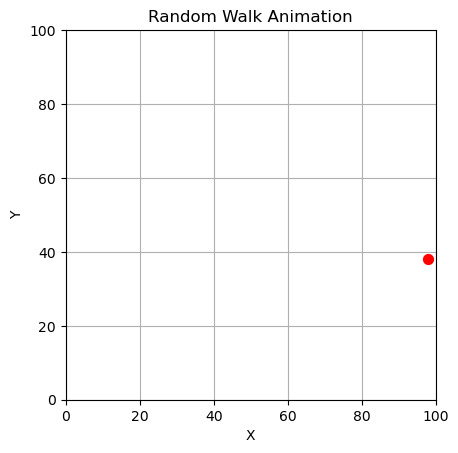

In [204]:
L = 101  # Grid size
iterations = 10000  # Number of steps
filename = "Hasans_random_walk.mp4"  # Output movie filename
animate_walk(L, iterations, filename)